In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
classes = np.loadtxt('./data/classes.txt', dtype=str)
class_dict = {i+1:x for i, x in enumerate(classes)}
columns = ["CLASS", "TITLE", "DESCRIPTION"]
ag_new_train = pd.read_csv('./data/train.csv', header=None)
ag_new_train.columns = columns
ag_new_train.head()

,CLASS,TITLE,DESCRIPTION
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [4]:
train_df = pd.DataFrame(data=ag_new_train["TITLE"] + " " + ag_new_train["DESCRIPTION"], columns=["POST"])
train_df["LABEL"] = ag_new_train["CLASS"].map(class_dict)

In [5]:
train_df.head()

,POST,LABEL
0,Wall St. Bears Claw Back Into the Black (Reute...,Business
1,Carlyle Looks Toward Commercial Aerospace (Reu...,Business
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,Business
3,Iraq Halts Oil Exports from Main Southern Pipe...,Business
4,"Oil prices soar to all-time record, posing new...",Business


In [6]:
len(train_df)

120000

In [7]:
def print_sample(index=None, df=train_df, return_sample=False):
    if index is None:
        index = np.random.randint(len(df))
    example = df.values[index]
    print(example[0])
    print('Label:', example[1])
    if return_sample:
        return example[0]

In [8]:
print_sample()

Toshiba has big plans for a small drive Toshiba Corp. plans to begin commercial production of its 0.85-inch hard disk drive before the end of this year, the company said on Tuesday.
Label: Sci/Tech


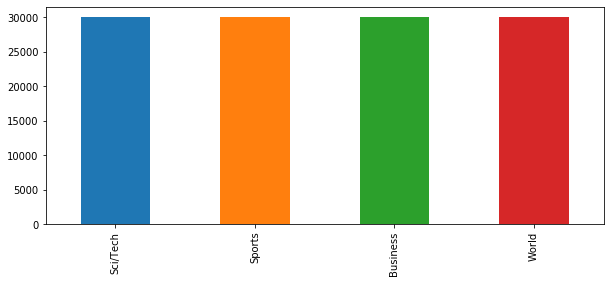

In [9]:
plt.figure(figsize=(10,4))
train_df["LABEL"].value_counts().plot(kind='bar');

In [10]:
pd.isnull(train_df['POST']).sum(), sum(train_df['POST'] == ""), sum(train_df['POST'] == " ")

(0, 0, 0)

In [11]:
train_df["POST_LENGTH"] = train_df["POST"].map(len)
train_df["POST_NUM_WORDS"] = train_df["POST"].map(lambda x: len(x.split()))

In [12]:
train_df.head()

,POST,LABEL,POST_LENGTH,POST_NUM_WORDS
0,Wall St. Bears Claw Back Into the Black (Reute...,Business,144,21
1,Carlyle Looks Toward Commercial Aerospace (Reu...,Business,266,36
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,Business,232,36
3,Iraq Halts Oil Exports from Main Southern Pipe...,Business,256,36
4,"Oil prices soar to all-time record, posing new...",Business,234,37


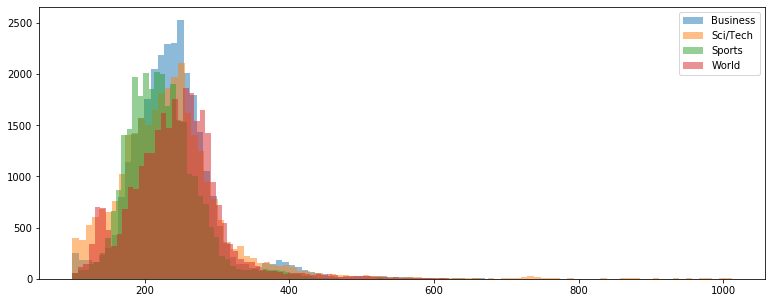

In [13]:
plt.figure(figsize=(13, 5))
for c in train_df.LABEL.unique():
    plt.hist(train_df[train_df["LABEL"] == c]["POST_LENGTH"], label=c, bins=100, alpha=0.5)
plt.legend()
plt.show()
plt.close()

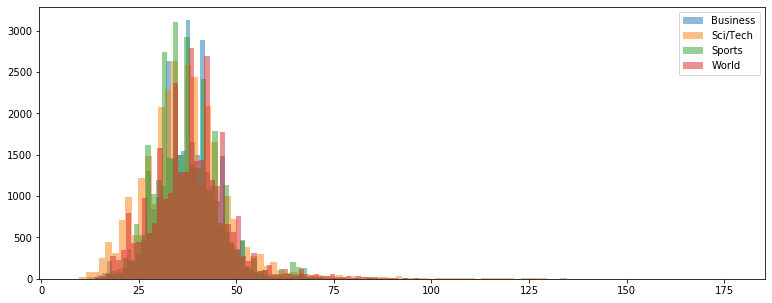

In [14]:
plt.figure(figsize=(13, 5))
for c in train_df.LABEL.unique():
    plt.hist(train_df[train_df["LABEL"] == c]["POST_NUM_WORDS"], label=c, bins=100, alpha=0.5)
plt.legend()
plt.show()
plt.close()

In [15]:
ag_new_test = pd.read_csv('./data/test.csv', header=None)
ag_new_test.columns = columns
ag_new_test.head()

,CLASS,TITLE,DESCRIPTION
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [16]:
test_df = pd.DataFrame(data=ag_new_test["TITLE"] + " " + ag_new_test["DESCRIPTION"], columns=["POST"])
test_df["LABEL"] = ag_new_test["CLASS"].map(class_dict)

In [17]:
test_df.head()

,POST,LABEL
0,Fears for T N pension after talks Unions repre...,Business
1,The Race is On: Second Private Team Sets Launc...,Sci/Tech
2,Ky. Company Wins Grant to Study Peptides (AP) ...,Sci/Tech
3,Prediction Unit Helps Forecast Wildfires (AP) ...,Sci/Tech
4,Calif. Aims to Limit Farm-Related Smog (AP) AP...,Sci/Tech


In [18]:
len(test_df)

7600

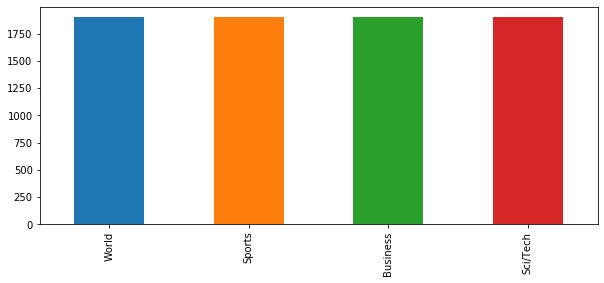

In [19]:
plt.figure(figsize=(10,4))
test_df["LABEL"].value_counts().plot(kind='bar');

In [20]:
from collections import Counter

def most_frequent_words(df, top_k=10):
    cnts = {}
    for post in df["POST"]:
        tmp_cnt = Counter(post.split())
        for word, count in tmp_cnt.items():
            if word in cnts:
                cnts[word] += count
            else:
                cnts[word] = count
    return sorted(cnts.items(), key=lambda tuple: tuple[1], reverse=True)[:top_k]

In [21]:
most_frequent_words(train_df)

[('the', 177529),
 ('to', 117605),
 ('a', 98112),
 ('of', 97395),
 ('in', 92055),
 ('and', 68046),
 ('on', 55156),
 ('for', 48430),
 ('-', 39105),
 ('#39;s', 30928)]

In [22]:
import nltk

In [23]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/sipan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
from nltk.corpus import stopwords

In [25]:
stopwords.words()

['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

In [26]:
stops = stopwords.words("english")

In [27]:
def most_frequent_words(df, top_k=30, stopwords=stops):
    cnts = {}
    for post in df["POST"]:
        tmp_cnt = Counter(post.split())
        for word, count in tmp_cnt.items():
            word = word.lower()
            if word in stopwords:
                continue
            if word in cnts:
                cnts[word] += count
            else:
                cnts[word] = count
    return sorted(cnts.items(), key=lambda tuple: tuple[1], reverse=True)[:top_k]

In [28]:
most_frequent_words(train_df)

[('-', 39105),
 ('#39;s', 31129),
 ('new', 21047),
 ('said', 16613),
 ('(reuters)', 12811),
 ('us', 11846),
 ('first', 8898),
 ('two', 8836),
 ('(ap)', 8282),
 ('--', 7867),
 ('ap', 7776),
 ('oil', 6996),
 ('u.s.', 6806),
 ('one', 6754),
 ('world', 6730),
 ('last', 6245),
 ('company', 5955),
 ('#39;', 5939),
 ('york', 5561),
 ('president', 5496),
 ('inc.', 5378),
 ('microsoft', 5285),
 ('monday', 4997),
 ('united', 4965),
 ('says', 4833),
 ('wednesday', 4807),
 ('could', 4786),
 ('iraq', 4753),
 ('tuesday', 4752),
 ('three', 4750)]

In [29]:
from pprint import pprint

In [30]:
for categ in train_df["LABEL"].unique():
    print(categ)
    pprint(most_frequent_words(train_df[train_df["LABEL"] == categ]))
    print()

Business
[('-', 9010),
 ('#39;s', 8939),
 ('said', 6655),
 ('new', 6505),
 ('oil', 6050),
 ('(reuters)', 5561),
 ('us', 5547),
 ('prices', 3727),
 ('inc.', 3551),
 ('company', 3302),
 ('u.s.', 3070),
 ('york', 3021),
 ('percent', 2846),
 ('profit', 2505),
 ('stocks', 2498),
 ('sales', 2474),
 ('corp.', 2446),
 ('million', 2310),
 ('shares', 2152),
 ('billion', 2029),
 ('monday', 1833),
 ('wednesday', 1813),
 ('tuesday', 1794),
 ('--', 1785),
 ('&lt;a', 1775),
 ('group', 1724),
 ('thursday', 1723),
 ('dollar', 1664),
 ('friday', 1568),
 ('world', 1567)]

Sci/Tech
[('-', 7853),
 ('new', 7015),
 ('#39;s', 6098),
 ('microsoft', 4567),
 ('said', 3219),
 ('software', 3143),
 ('internet', 2858),
 ('company', 2334),
 ('search', 2146),
 ('space', 2125),
 ('first', 2105),
 ('computer', 2026),
 ('(ap)', 2022),
 ('security', 1983),
 ('music', 1981),
 ('(reuters)', 1928),
 ('--', 1898),
 ('web', 1868),
 ('online', 1817),
 ('inc.', 1785),
 ('mobile', 1734),
 ('service', 1723),
 ('technology', 1705),

In [31]:
def get_sample_with(expr, data=train_df["POST"], max_size=5, with_spaces=True):
    if with_spaces:
        found_data = [i for i in data if ' {} '.format(expr) in i]
    else:
        found_data = [i for i in data if expr in i]
    if len(found_data) == 0:
        print("no such examples")
    elif max_size >= len(found_data):
        for row in found_data:
            print(row, end="\n\n")
    else:
        for row in np.random.choice(found_data, max_size, False):
            print(row, end="\n\n")        

In [32]:
get_sample_with("#39;s")

Indonesian Police Detain Seven People on Terror Links Indonesian police have detained seven people linked to terrorism since last week #39;s bombing outside the Australian embassy in Jakarta that killed nine people and wounded 182, officers said on Friday.

Barcelona loses, Real beats Albacete Brazilian forwards Edu Schmidt and Ricardo Oliveira scored as Real Betis ended Barcelona #39;s unbeaten streak with a 2-1 win Sunday.

Naive? Not our Kev! SOMEBODY obviously hasn #39;t mentioned to Kevin Keegan that he #39;s supposed to be tactically naive. Because there was nothing remotely naive about Keegan #39;s tactics at Old Trafford yesterday as the Manchester City 

Kodak to cut jobs in England, France Eastman Kodak Co. will close a plant in England, shut down product lines in France and make other shifts in the two countries as part of the company #39;s historic push into digital imaging.

Tanks close in on sacred shrine as US launches fresh assault on &lt;b&gt;...&lt;/b&gt; US forces re

In [33]:
get_sample_with("&lt;a")

Adobe patches Acrobat, Reader flaws &lt;a href="http://informationweek.com/story/showArticle.jhtml?articleID=55800680"&gt;Adobe Repairs Reader, Acrobat Flaws&lt;/a&gt; &lt;font size=-1 color=#6f6f6f&gt;&lt;nobr&gt;Information Week&lt;/nobr&gt;

Sony launches iPod killer &lt;a href="http://www.fool.com/News/mft/2004/mft04113013.htm"&gt;Sony vs. Big Apple&lt;/a&gt; &lt;font size=-1 color=#6f6f6f&gt;&lt;nobr&gt;Motley Fool&lt;/nobr&gt;

SD in the cards for Nokia &lt;a href="http://p2pnet.net/story/2429"&gt;Nokia takes up SD cards&lt;/a&gt; &lt;font size=-1 color=#6f6f6f&gt;&lt;nobr&gt;p2pnet.net&lt;/nobr&gt;

Nokia overcomes SD Card phobia &lt;a href="http://www.technewsworld.com/story/Nokia-Adopts-SD-Card-Tech-into-Storage-Portfolio-36603.html"&gt;Nokia Adopts SD Card Tech into Storage Portfolio&lt;/a&gt; &lt;font size=-1 color=#6f6f6f&gt;&lt;nobr&gt;TechNewsWorld&lt;/nobr&gt;

Older Windows OSes need critical patch &lt;a href="http://www.vnunet.com/news/1159817"&gt;Microsoft releases cr

In [34]:
mask = train_df["POST"].str.contains("&lt;")
mask.sum()

5241

In [35]:
mask2 = train_df["POST"].str.contains('&lt;a href="')
mask2.sum()

62

In [36]:
mask3 = train_df["POST"].str.contains('&gt;')
mask3.sum()

5243

In [37]:
train_df["POST"][mask ^ mask2].iloc[0]

"HP: The Adaptive Enterprise that can't adapt &lt;strong&gt;Opinion&lt;/strong&gt; SAP hardly to blame"

In [38]:
train_df["POST"][mask3 ^ mask].iloc[0]

'Hidden Java Features \\\\Really cool blog post about hidden Java features.  These are little tricks that\\you forget about from time to time but that make life more pleasant.\\\\This is a good one:\\\\"Instance initializers -- I\'ve been exploiting these lately to abbreviate list\\initialization (in unit tests only):\\&gt;\\List triple = new ArrayList(3) \\&gt;\\   add("a"); add("b"); add("c"); \\&gt;\\;"\\\\I\'ve been using static code blocks but this looks like it might be a better\\trick.\\\\Example:\\\\"public static List = new ArrayList();\\&gt;\\static \\    list.add( "foo" );\\"\\\\Also this final Closure  hack seems pretty cool:\\\\'

In [39]:
train_df["POST"][train_df["POST"].str.contains("&lt;a")]

368       AMD starts shipping 90-nanometer chips to cust...
1505      Hunters are poised as some whales thrive CAP D...
3016      Google faces another trademark suit in Germany...
4015      No Frills, but Everything Else Is on Craigslis...
9411      Outsourcing issue flares up at chip conference...
14677     California cities, counties sue Microsoft Six ...
15168     Data Center Markup Language finds home in OASI...
15681     Skype dials up beta software for Mac OS X Skyp...
26835     SD in the cards for Nokia &lt;a href="http://n...
27072     SD in the cards for Nokia &lt;a href="http://p...
27728     SD in the cards for Nokia &lt;a href="http://n...
28041     Nokia overcomes SD Card phobia &lt;a href="htt...
37429     Sony to support MP3 - shock &lt;a href="http:/...
37812     Sony shifts strategy to support MP3 files &lt;...
41076     Microsoft to charge for Hotmail-Outlook link M...
47018     Gates pitches computer science, biology studie...
49078     Oracle exec upbeat about China

In [40]:
from string import punctuation

In [41]:
punctuation = set(punctuation)

In [42]:
import re
regex = re.compile(r"\d+|\D+")

In [44]:
def process_number(string_number):
    number = int(string_number)
    if number < 10:
        return "LT10"
    if number < 100:
        return "LTH"
    if number < 1000:
        return "LTT"
    return "GTT"

In [45]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [46]:
stops

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [47]:
def simple_cleaning(text):
    text = text.replace(" #39;", "")
    text = text.replace("&lt;", "<")
    text = text.replace("&gt;", ">")
    text = text.replace(",", "")
    text = "".join([char if char not in punctuation else " " for char in text])
    text = text.lower()
    text_words = text.split()
    text_words2 = []
    for word in text_words:
        text_words2.extend(regex.findall(word))
    text_words2 = [word for word in text_words2 if word not in stops]
    text_words2 = [stemmer.stem(word) if not word.isnumeric() else process_number(word) for word in text_words2]
    return " ".join(text_words2)

In [48]:
sample = print_sample(return_sample=True)

Lawrence Dallaglio: The England captain who said  #39;enough is enough &lt;b&gt;...&lt;/b&gt; When Lawrence Dallaglio walked into the late-night bar of the Hilton Hotel in Brisbane a couple of hours after England #39;s 36-point defeat at the hands of the Wallabies last June and pronounced himself  quot;suicidal quot;, no one among his handful of listeners felt 
Label: Sports


In [49]:
simple_cleaning(sample)

'lawrenc dallaglio england captain said enough enough b b lawrenc dallaglio walk late night bar hilton hotel brisban coupl hour england LTH point defeat hand wallabi last june pronounc quot suicid quot one among hand listen felt'

In [50]:
data_raw = train_df["POST"]

In [75]:
data_processed = data_raw.map(lambda text: simple_cleaning(text))

In [76]:
for categ in train_df["LABEL"].unique():
    categ_mask = train_df["LABEL"] == categ
    print(categ)
    needed_part = data_processed[categ_mask]
    print(round(needed_part.str.contains(" LT10 ").sum()/len(needed_part), 2), 
          round(needed_part.str.contains(" LTH ").sum()/len(needed_part), 2),
          round(needed_part.str.contains(" LTT ").sum()/len(needed_part), 2),
          round(needed_part.str.contains(" GTT ").sum()/len(needed_part), 2), end="\n\n")

Business
0.25 0.25 0.09 0.1

Sci/Tech
0.18 0.17 0.06 0.13

Sports
0.26 0.29 0.08 0.09

World
0.08 0.2 0.06 0.07



In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train_raw, X_val_raw, y_train, y_val = train_test_split(data_raw, train_df["LABEL"], 
                                                          test_size=len(test_df), random_state = 17, 
                                                          stratify = train_df["LABEL"])
X_train_raw = np.array(X_train_raw)
X_val_raw = np.array(X_val_raw)
y_train = np.array(y_train)
y_val = np.array(y_val)

print(X_train_raw.shape, X_val_raw.shape)

(112400,) (7600,)


In [77]:
X_train_pr, X_val_pr, y_train, y_val = train_test_split(data_processed, train_df["LABEL"], 
                                                        test_size=len(test_df), random_state = 17, 
                                                        stratify = train_df["LABEL"])
X_train_pr = np.array(X_train_pr)
X_val_pr = np.array(X_val_pr)
y_train = np.array(y_train)
y_val = np.array(y_val)

print(X_train_pr.shape, X_val_pr.shape)

(112400,) (7600,)


In [78]:
from fasttext import train_supervised

In [79]:
def to_fasttext_format(data: list, labels: list, save_path: str=None):
    ft_data = []
    for text, label in zip(data, labels):
        ft_data.append("__label__{} {}".format(label, text))
    if save_path:
        with open(save_path, "w+") as outfile:
            outfile.write("\n".join(ft_data))
    else:
        return ft_data

In [80]:
to_fasttext_format(X_train_raw, y_train, "train_raw.txt")
to_fasttext_format(X_val_raw, y_val, "val_raw.txt")

In [81]:
to_fasttext_format(X_train_pr, y_train, "train_proc.txt")
to_fasttext_format(X_val_pr, y_val, "val_proc.txt")

In [89]:
from tqdm import tqdm
import numpy as np

In [95]:
def evaluate(train_data_path, val_data_path, k=9):
    scores, models = [], []
    
    for _ in tqdm(range(k)):
        model = train_supervised(train_data_path, loss="ns", minCount=5)
        scores.append(model.test(val_data_path)[-1])
        models.append(model)
    args = np.argsort(scores)
    median_index = args[len(args)//2]
    return scores[median_index], models[median_index]

In [96]:
score1, model1 = evaluate("train_raw.txt", "val_raw.txt")

100%|██████████| 9/9 [00:35<00:00,  3.93s/it]


In [97]:
score2, model2 = evaluate("train_proc.txt", "val_proc.txt")

100%|██████████| 9/9 [00:25<00:00,  2.79s/it]


In [99]:
score1, score2

(0.9180263157894737, 0.9151315789473684)

In [98]:
len(model1.get_words()), len(model2.get_words())

(44700, 17988)

In [100]:
m1_words = set(model1.get_words())
m2_words = set(model2.get_words())

In [101]:
[i for i in m1_words if i not in m2_words]

['Insurgent',
 'forever.',
 'Luxembourg,',
 '\\$120',
 'third-place',
 'Forest,',
 'after\\the',
 'drama.',
 'Shopping.com',
 'off:',
 'decades',
 'CTO',
 'dusting',
 'released',
 'shuffle',
 'EDGE',
 'ARM',
 'Regrets',
 'Pact',
 'Solaris',
 'Tajik',
 'Millar,',
 'effectively',
 'Directory',
 'CHINA',
 'presses',
 'MADRAS,',
 'definition',
 'embarrassment',
 'speeding',
 'add-on',
 'sleeping',
 "fans'",
 'LAKE',
 'III,',
 'fuel-saving',
 'Pixar',
 '190,',
 'cautiously',
 'Bart',
 'elders',
 'CARSON,',
 'communists',
 'McCartney',
 'rest,',
 'Adolf',
 'camera.',
 'minnows',
 'Chileans',
 'succumbed',
 'arm.',
 'Raja',
 'Patty',
 "Leader's",
 'testified',
 'widens',
 'hotel,',
 'Lima',
 'Bernie',
 "customers'",
 'infrastructure.',
 'audiotape',
 'scary',
 'Acura',
 'objected',
 'million-dollar',
 '(CBS)',
 'Apparent',
 'Zalayeta',
 'Nailon',
 'extension,',
 'bounced',
 'hurricane',
 'Really',
 'betting.',
 "Peru's",
 'magistrate',
 'wartime',
 "Woman's",
 'indemnify',
 'Auction',
 'Mervy

In [103]:
simple_cleaning('5-3')

'LT10 LT10'

In [104]:
[i for i in m2_words if i not in m1_words]

['melvil',
 'perman',
 'capitol',
 'centrica',
 'empress',
 'readi',
 'swivel',
 'britney',
 'manpow',
 'bollor',
 'wm',
 'pena',
 'anxiou',
 'niec',
 'visteon',
 'equat',
 'joanna',
 'arnesen',
 'procur',
 'infiltr',
 'joschka',
 'lonesom',
 'phenomen',
 'pepsi',
 'dour',
 'divid',
 'refurbish',
 'lampedusa',
 'nyse',
 'eminem',
 'chronolog',
 'flatul',
 'lindow',
 'emeryvil',
 'edgerrin',
 'academ',
 'circl',
 'netlin',
 'bruin',
 'rosen',
 'diouf',
 'oversupport',
 'mateo',
 'righti',
 'batteri',
 'ellison',
 'enabl',
 'candl',
 'stockholm',
 'chamberlin',
 'majest',
 'verifi',
 'hamdi',
 'prudenti',
 'alonzo',
 'iressa',
 'kosuk',
 'befuddl',
 'azam',
 'shelv',
 'gibb',
 'tbilisi',
 'poni',
 'teleconfer',
 'overwhelmingli',
 'bombay',
 'blumenth',
 'randl',
 'artwork',
 'txu',
 'winn',
 'aru',
 'updat',
 'accredo',
 'assail',
 'haq',
 'jc',
 'oslo',
 'mckenzi',
 'whitehal',
 'talki',
 'theodor',
 'starkli',
 'beti',
 'deni',
 'ogl',
 'gilmor',
 'smb',
 'spreadsheet',
 'sanchez',
 '

In [268]:
import sys
sys.path.append("./fasttext-tensorflow/")

In [269]:
import fasttext_model

In [278]:
ft_model = fasttext_model.train_supervised('./train_raw.txt', './val_raw.txt', 
                            hyperparams={"learning_rate": 0.07, "n_epochs": 3, "l2_reg_weight": 1e-5, 
                                         "min_word_count": 5,
                                        "batch_size": 8096, "batch_size_inference": 8096})

training with arguments:
Namespace(batch_norm=0, batch_size=8096, batch_size_inference=8096, cache_dir='/home/sipan/projects/mine/DSSS19/cache', data_fraction=1.0, dim=100, dropout=0.5, flush=1, force=0, gpu_fraction=0.5, l2_reg_weight=1e-05, label_prefix='__label__', learning_rate=0.07, learning_rate_multiplier=0.8, min_label_count=1, min_word_count=5, n_epochs=3, result_dir='/home/sipan/projects/mine/DSSS19/results', save_models=0, seed=17, sort_ngrams=0, top_k=5, train_path='/home/sipan/projects/mine/DSSS19/train_raw.txt', use_gpu=0, use_validation=1, validation_path='./val_raw.txt', word_ngrams=1)


training hyper-parameters hashed: 89795d36327059dc6b17396827da4ddc
preparing dataset
total number of datapoints: 112400
max number of words in description: 178
max number of words with n-grams in description: 179
100%|██████████| 112400/112400 [00:05<00:00, 22095.67it/s]

Creating train vocabulary ...
Read 4.3m words and phrases
Number of unique words and phrases: 181816
number of uniqu

In [279]:
ft_model.test_file("./train_raw.txt")

100%|██████████| 1124/1124 [00:08<00:00, 131.17it/s]


(112400, 0.92796, 0.92796)

In [280]:
ft_model.test_file("./val_raw.txt")

100%|██████████| 76/76 [00:00<00:00, 132.21it/s]


(7600, 0.89789, 0.89789)

In [281]:
ft_model2 = fasttext_model.train_supervised('./train_proc.txt', './val_proc.txt', 
                            hyperparams={"learning_rate": 0.07, "n_epochs": 3, "l2_reg_weight": 1e-5, 
                                         "min_word_count": 5,
                                        "batch_size": 8096, "batch_size_inference": 8096})

training with arguments:
Namespace(batch_norm=0, batch_size=8096, batch_size_inference=8096, cache_dir='/home/sipan/projects/mine/DSSS19/cache', data_fraction=1.0, dim=100, dropout=0.5, flush=1, force=0, gpu_fraction=0.5, l2_reg_weight=1e-05, label_prefix='__label__', learning_rate=0.07, learning_rate_multiplier=0.8, min_label_count=1, min_word_count=5, n_epochs=3, result_dir='/home/sipan/projects/mine/DSSS19/results', save_models=0, seed=17, sort_ngrams=0, top_k=5, train_path='/home/sipan/projects/mine/DSSS19/train_proc.txt', use_gpu=0, use_validation=1, validation_path='./val_proc.txt', word_ngrams=1)


training hyper-parameters hashed: cab03de38722596b497d374597ddb821
preparing dataset
total number of datapoints: 112400
max number of words in description: 182
max number of words with n-grams in description: 183
100%|██████████| 112400/112400 [00:04<00:00, 23976.25it/s]

Creating train vocabulary ...
Read 4.4m words and phrases
Number of unique words and phrases: 62372
number of uniq

In [282]:
ft_model2.test_file("./train_proc.txt")

100%|██████████| 1124/1124 [00:08<00:00, 128.08it/s]


(112400, 0.92253, 0.92253)

In [283]:
ft_model2.test_file("./val_proc.txt")

100%|██████████| 76/76 [00:00<00:00, 120.76it/s]


(7600, 0.90237, 0.90237)

In [69]:
%%time
train_supervised("train_raw.txt", loss="ns", minCount=1)

CPU times: user 10.1 s, sys: 112 ms, total: 10.2 s
Wall time: 3.95 s


In [70]:
from itertools import product

In [71]:
%%time
model1.test("val_raw.txt")

CPU times: user 104 ms, sys: 0 ns, total: 104 ms
Wall time: 105 ms


(7600, 0.9172368421052631, 0.9172368421052631)

In [72]:
from tqdm import tqdm, tqdm_notebook

In [73]:
to_fasttext_format(X_train_raw, y_train, "train_raw.txt")
to_fasttext_format(X_val_raw, y_val, "val_raw.txt")

In [74]:
len(y_val)

7600

In [115]:
indieces = np.random.choice(np.arange(len(X_train_pr)), size=7*len(X_val_pr), replace=False)
sample_train = [X_train_pr[i] for i in indieces]
sample_train_labels = [y_train[i] for i in indieces]
to_fasttext_format(sample_train, sample_train_labels, "train_sample1.txt")

In [116]:
Counter(sample_train_labels)

Counter({'Sports': 13333,
         'World': 13256,
         'Business': 13358,
         'Sci/Tech': 13253})

In [82]:
def hyperparameter_grid_search(minCounts=[1, 10],
                              wordNgrams = [1, 2],
                              minns=[0, 3],
                              maxns=[0, 3, 4],
                              lrs=[0.3, 0.1, 0.05],
                              dims=[50, 100, 200],
                              epochs=[3, 5, 7],
                              losses=["hs", "ns", "softmax", "ova"]):
    p = list(product(minCounts, wordNgrams, minns, maxns, lrs, dims, epochs, losses))
    pbar = tqdm_notebook(total=len(p))
    best_score, best_model, best_params = -1, None, None
    for min_count, wng, minn, maxn, lr, dim, ep, l in p:
        params = {"minCount": min_count, "wordNgrams":wng, "minn": minn, "maxn": maxn,
                              "lr":lr, "dim": dim, "epoch": ep, "loss": l}
        if minn > maxn:
            pbar.update()
            continue
        if (minn == 0) and (maxn!=0):
            pbar.update()
            continue

        model = train_supervised("train_sample1.txt", minCount=min_count, wordNgrams=wng, minn=minn, maxn=maxn,
                                 loss=l, dim=dim, epoch=ep)
        score = model.test("val_proc.txt")[-1]
        pbar.update()
        if score > best_score:
            best_score = score
            best_params = params
            best_model = model
            
    return best_score, best_params, best_model
        
    #-minCount
    #-wordNgrams
    #-minn
    #-maxn
    #-lr
    #-lrUpdataRate
    #-dim
    #-epoch
    #-loss

In [140]:
def hyperparameter_grid_search_small(minCounts=[1, 5, 10],
                                     wordNgrams = [1, 2],
                                    lrs=[0.5, 0.3, 0.1],
                                    k=5):
    history = []
    p = list(product(minCounts, wordNgrams, lrs))
    pbar = tqdm_notebook(total=len(p))
    best_score, best_model, best_params = -1, None, None
    for min_count, wng, lr in p:
        params = {"minCount": min_count, "wordNgrams":wng, "lr": lr}
#         if minn > maxn:
#             pbar.update()
#             continue
#         if (minn == 0) and (maxn!=0):
#             pbar.update()
#             continue
        score = 0
        for _ in range(k):
            model = train_supervised("train_sample1.txt", minCount=min_count, wordNgrams=wng, loss="ova", lr=lr)
            score += model.test("val_proc.txt")[-1]
        score = score/k
        pbar.update()
        if score > best_score:
            best_score = score
            best_params = params
            best_model = model
        params["score"] = score
        history.append(params)
            
    return best_score, best_params, best_model, history
        
    #-minCount
    #-wordNgrams
    #-minn
    #-maxn
    #-lr
    #-lrUpdataRate
    #-dim
    #-epoch
    #-loss

In [141]:
# hyperparameter_grid_search()

In [145]:
res = hyperparameter_grid_search_small()

In [146]:
res1 = pd.DataFrame(res[-1]).sort_values("score", ascending=False)

In [147]:
res1

,lr,minCount,score,wordNgrams
4,0.3,1,0.914605,2
10,0.3,5,0.914211,2
11,0.1,5,0.913868,2
5,0.1,1,0.913816,2
17,0.1,10,0.913658,2
16,0.3,10,0.913237,2
9,0.5,5,0.913184,2
3,0.5,1,0.913132,2
15,0.5,10,0.912684,2
2,0.1,1,0.907895,1


In [105]:
res1[(res1.minn == 0)].groupby("loss")["score"].mean()

loss
hs         0.891118
ns         0.898783
ova        0.899309
softmax    0.895888
Name: score, dtype: float64

In [104]:
res1[(res1.minn == 0) & (res1.minCount==1)].groupby("loss")["score"].mean()

loss
hs         0.891053
ns         0.899276
ova        0.900197
softmax    0.896382
Name: score, dtype: float64

In [99]:
res1[res1.maxn == 4].groupby("loss")["score"].mean()

loss
hs         0.838322
ns         0.879375
ova        0.870296
softmax    0.867961
Name: score, dtype: float64

In [102]:
res1[res1.minCount == 1].groupby("loss")["score"].mean()

loss
hs         0.859649
ns         0.886996
ova        0.881732
softmax    0.878004
Name: score, dtype: float64

In [69]:
import fasttext

In [70]:
unsup_ft = fasttext.train_unsupervised("./train_raw.txt")

In [84]:
import numpy as np

In [87]:
np.sqrt(np.sum(np.square(unsup_ft.get_word_vector("abcd") - unsup_ft.get_word_vector("abce"))))

1.3175017

In [88]:
np.sqrt(np.sum(np.square(unsup_ft.get_word_vector("dell") - unsup_ft.get_word_vector("abce"))))

3.3750553